In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import seaborn as sns 
import numpy as np
import tensorflow as tf
#installed necessary libraries and imported them

In [2]:
df = pd.read_csv(r"C:\Users\aduka\Downloads\Rel Ind (5).csv")
#Historical prices of Reliance Ind. over the last 5 years

In [3]:
df.head()

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
0,20-07-2018,1110.50,1138.25,1110.50,1128.55,1125.24,446801,12094,502759907.0,109831.0,24.58,27.75,18.05
1,23-07-2018,1129.70,1130.00,1114.00,1120.15,1119.63,205750,4704,230363644.0,69915.0,33.98,16.00,-9.55
2,24-07-2018,1122.00,1126.10,1107.65,1110.55,1115.07,305391,5790,340531123.0,135804.0,44.47,18.45,-11.45
3,25-07-2018,1112.25,1122.30,1104.55,1114.05,1116.14,265010,5802,295787919.0,102790.0,38.79,17.75,1.80
4,26-07-2018,1113.00,1121.00,1107.70,1110.35,1114.83,154028,4490,171715377.0,60309.0,39.15,13.30,-2.65


In [4]:
df.tail()

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
1232,14-07-2023,2751.05,2760.8,2723.75,2738.9,2738.69,499323,26100,1.367493e+09,170719.0,34.19,37.05,-12.15
1233,17-07-2023,2746.70,2816.0,2728.55,2796.4,2780.31,453640,21402,1.261261e+09,256190.0,56.47,87.45,49.70
1234,18-07-2023,2812.05,2838.0,2794.00,2822.4,2813.55,364444,19866,1.025382e+09,200000.0,54.88,44.00,10.35
1235,19-07-2023,2832.00,2855.0,2796.45,2840.0,2825.84,782335,43098,2.210751e+09,417880.0,53.41,58.55,8.00
1236,20-07-2023,2589.00,2632.0,2582.00,2619.8,2614.32,400680,17951,1.047507e+09,177445.0,44.29,50.00,30.80


In [5]:
df = df[["Close"]].copy()


In [6]:
df.describe()

,Close
count,1237.000000
mean,1934.437672
std,541.733554
min,883.850000
25%,1351.100000
50%,2055.550000
75%,2424.150000
max,2840.000000


In [7]:
# Check if price series is stationary
from statsmodels.tsa.stattools import adfuller #Import adfuller function through module

result = adfuller(df.Close.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -1.2780641939289052
p-value: 0.6391472738132512


In [8]:
from pmdarima.arima.utils import ndiffs

In [9]:
ndiffs(df.Close, test="adf")

1

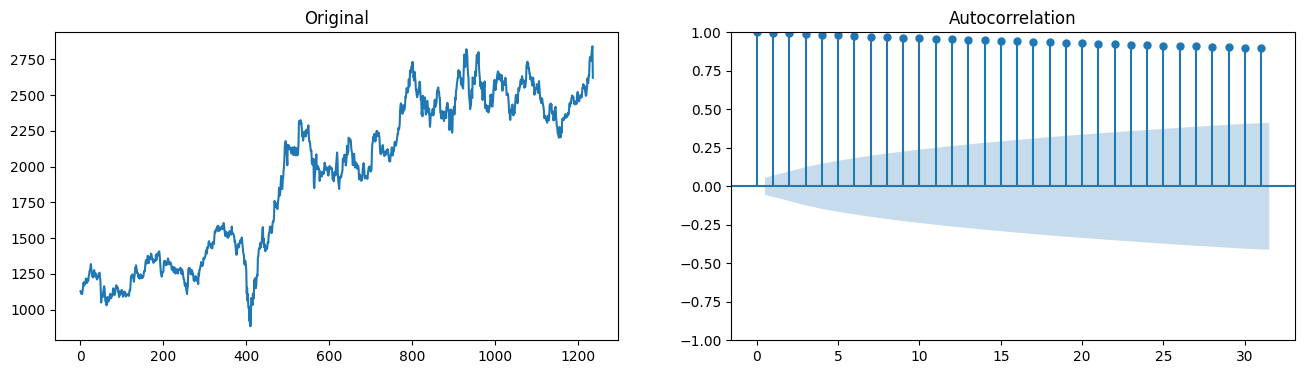

In [12]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(df.Close)

ax1.set_title("Original")

# add ; at the end of the plot function so that the plot is not duplicated
plot_acf(df.Close, ax=ax2);

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf



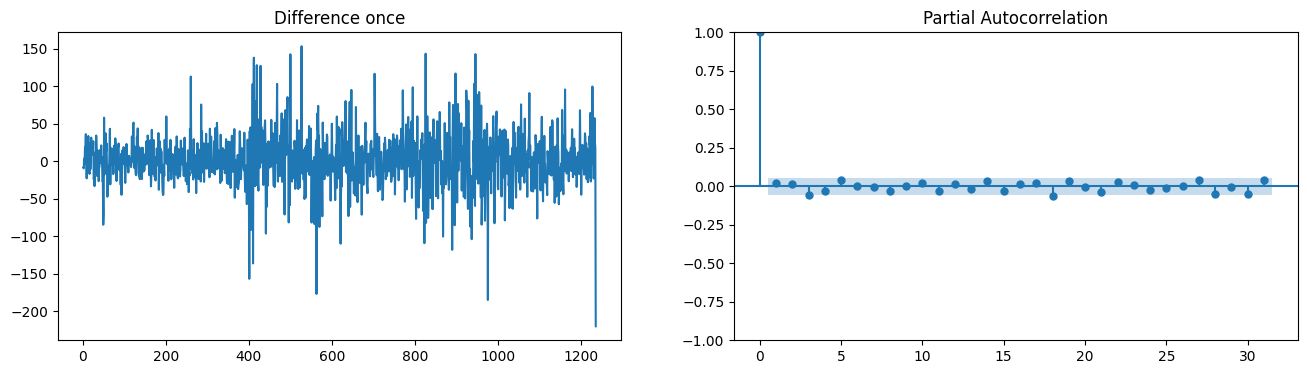

In [18]:
diff = df.Close.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot (diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)

plot_pacf (diff, ax=ax2);




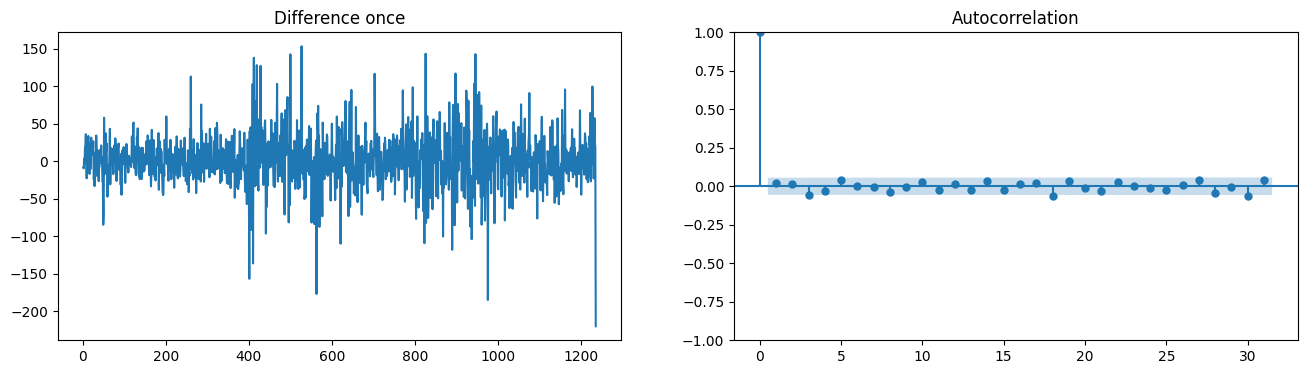

In [20]:
diff = df.Close.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot (diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_acf(diff, ax=ax2);

In [57]:
from statsmodels.tsa.arima.model import ARIMA


#Fitting the ARIMA model with a different optimization method (e.g., 'nm')
model = ARIMA(df.Close, order=(5, 1, 5))
result = model.fit()

print(result.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1237
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -6148.938
Date:                Thu, 03 Aug 2023   AIC                          12319.875
Time:                        04:17:00   BIC                          12376.191
Sample:                             0   HQIC                         12341.058
                               - 1237                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1625      0.172     -0.946      0.344      -0.499       0.174
ar.L2          0.1341      0.171      0.787      0.432      -0.200       0.468
ar.L3          0.1444      0.147      0.984      0.3

C:\Users\aduka\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(array([1.38786262e-04, 6.95138147e-03, 3.68085304e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.03418530e-06]),
 array([-211.16264834,  -77.19138351,   56.77988133,  190.75114616,
         324.72241099,  458.69367583,  592.66494066,  726.6362055 ,
         860.60747033,  994.57873517, 1128.55      ]),
 <BarContainer object of 10 artists>)

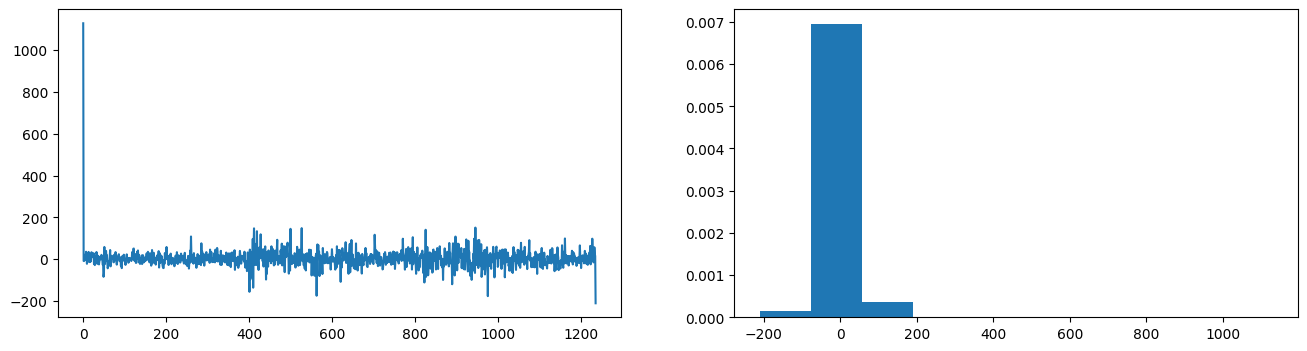

In [58]:
# Plot residual errors
residuals = pd.DataFrame(result.resid)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot (residuals) 
ax2.hist (residuals, density=True)


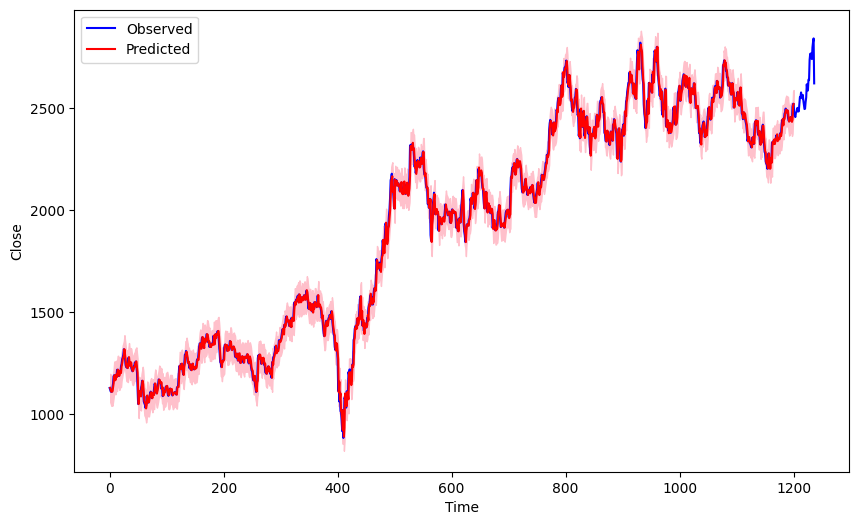

In [59]:
from statsmodels.tsa.arima.model import ARIMA

# Get predictions and confidence intervals
pred = result.get_prediction(start=1, end=1200, dynamic=False)
# Plotting the predictions
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df.Close.values, label='Observed', color='blue')
ax.plot(pred.predicted_mean, label='Predicted', color='red')
ax.fill_between(pred.conf_int().index, pred.conf_int()['lower Close'], pred.conf_int()['upper Close'], color='pink')
ax.set_xlabel('Time')
ax.set_ylabel('Close')
plt.legend()
plt.show()


In [60]:
#Train and test data split 
n = int(len(df) * 0.75)
train = df.Close[:n]
test = df.Close[n:]

print (len(train))
print (len(test))

927
310


In [77]:
step = 30
forecast = result.forecast(steps=step)
conf_int = result.conf_int(alpha=0.05)  # 95% confidence level


fc = pd.Series(forecast, index=test[:step].index)
lower = pd.Series(conf_int.iloc[:, 0], index=test[:step].index)
upper = pd.Series(conf_int.iloc[:, 1], index=test[:step].index)


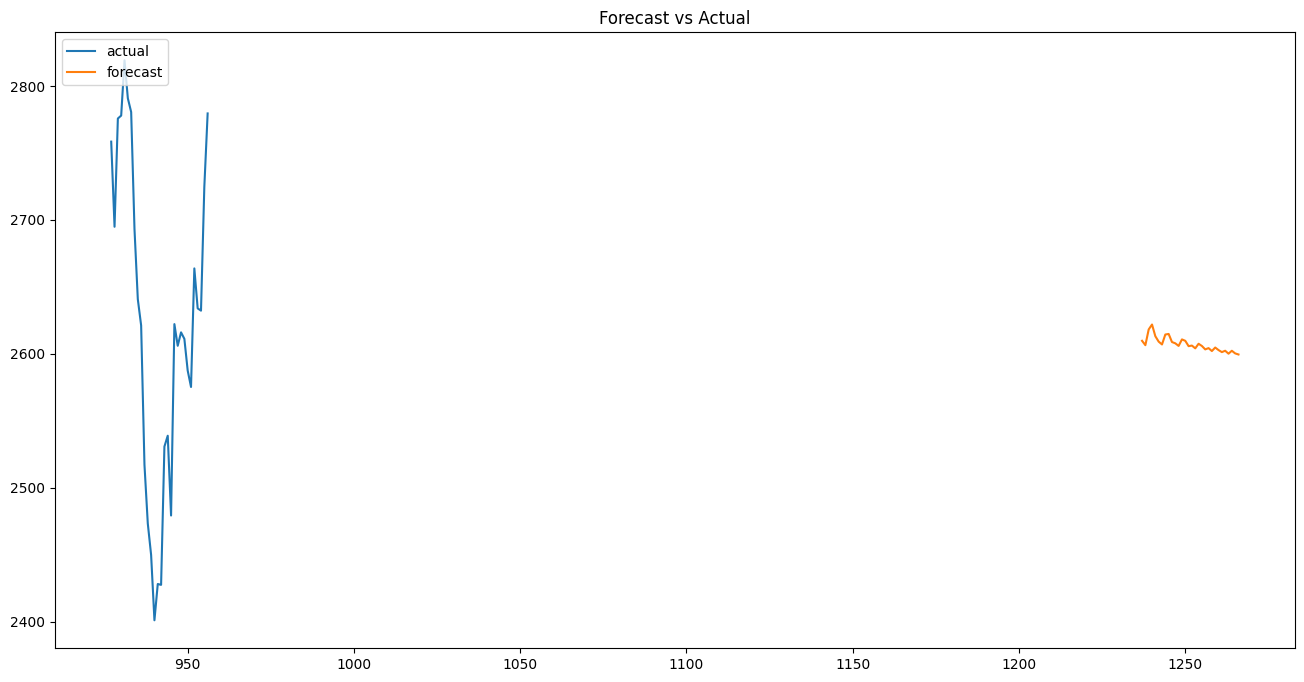

In [78]:
plt.figure(figsize=(16, 8))

plt.plot(test[:step], label="actual")

plt.plot(forecast, label="forecast")
plt.fill_between(lower.index, lower, upper, color="k", alpha=0.05)
plt.title("Forecast vs Actual")
plt.legend(loc="upper left")

 

